In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers
import pickle
from sklearn.model_selection import train_test_split as tts

Using TensorFlow backend.
/home/slcf/.pyenv/versions/3.6.2/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

In [3]:
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

In [161]:
n_points = 10000
X,color = datasets.samples_generator.make_s_curve(n_points,random_state=0) #S-curve
#X,color = datasets.samples_generator.make_swiss_roll(n_points,random_state=0)

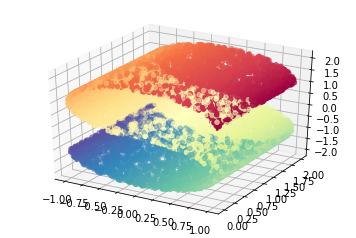

In [162]:
#X = 0.04*X # in the case of swiss roll
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
#plt.savefig('../figures/SR_3D.png')
#plt.savefig('../figures/SC_3D.png')
plt.show()


In [163]:
xtrain,xtest,ytrain,ytest = tts(X,color,test_size = 0.3)

## Manifold Learning (Hessian LLE)

In [197]:
x_lle = manifold.LocallyLinearEmbedding(15,2,eigen_solver = 'auto',
                                       method = 'modified').fit_transform(xtest)


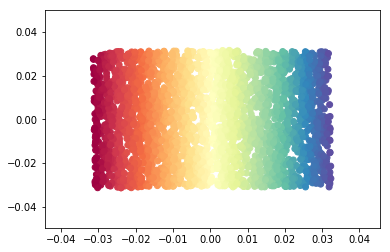

In [198]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_lle[:,0],x_lle[:,1],c=ytest,cmap=plt.cm.Spectral)
#plt.savefig('../figures/SR_lle.png')
#plt.savefig('../figures/SC_lle.png')
plt.show()

In [166]:
import sys
sys.path.append('../')
from mnist_dae import *
from toy_dae import *

In [15]:
xtrain.shape[1]

3

In [167]:
#toy_dae = Toy_DAE(xtrain,noise_type = "gaussian",noise_scale = 0.03,num_batch = 300,noise_rep = 1,test_size = 0.1,dims=[2000],epoch=300)
toy_dae = Toy_DAE(xtrain,noise_type = "gaussian",noise_scale = 0.15,num_batch = 300,noise_rep = 1,test_size = 0.1,dims=[2000],epoch=300)#S-curve

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 2000)              8000      
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 6003      
Total params: 14,003
Trainable params: 14,003
Non-trainable params: 0
_________________________________________________________________
None


In [168]:
toy_dae.train_dae()

loss type is  mean_squared_error
train the DAE model with noise  gaussian  ( 0.15 )
Train on 6300 samples, validate on 700 samples
Epoch 1/300
6300/6300 [==============================] - 0s 19us/step - loss: 0.2209 - val_loss: 0.0241
Epoch 2/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0228 - val_loss: 0.0217
Epoch 3/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0216 - val_loss: 0.0236
Epoch 4/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0216 - val_loss: 0.0210
Epoch 5/300
6300/6300 [==============================] - 0s 12us/step - loss: 0.0215 - val_loss: 0.0213
Epoch 6/300
6300/6300 [==============================] - 0s 12us/step - loss: 0.0216 - val_loss: 0.0242
Epoch 7/300
6300/6300 [==============================] - 0s 12us/step - loss: 0.0213 - val_loss: 0.0228
Epoch 8/300
6300/6300 [==============================] - 0s 12us/step - loss: 0.0223 - val_loss: 0.0218
Epoch 9/300
6300/6300 [==============

Epoch 78/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0173 - val_loss: 0.0174
Epoch 79/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0174 - val_loss: 0.0161
Epoch 80/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0163 - val_loss: 0.0170
Epoch 81/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0184 - val_loss: 0.0169
Epoch 82/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0178 - val_loss: 0.0169
Epoch 83/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0166 - val_loss: 0.0182
Epoch 84/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0165 - val_loss: 0.0158
Epoch 85/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0174 - val_loss: 0.0200
Epoch 86/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0178 - val_loss: 0.0182
Epoch 87/300
6300/6300 [==============================]

6300/6300 [==============================] - 0s 11us/step - loss: 0.0163 - val_loss: 0.0153
Epoch 156/300
6300/6300 [==============================] - 0s 12us/step - loss: 0.0146 - val_loss: 0.0164
Epoch 157/300
6300/6300 [==============================] - 0s 12us/step - loss: 0.0150 - val_loss: 0.0158
Epoch 158/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0163 - val_loss: 0.0172
Epoch 159/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0151 - val_loss: 0.0150
Epoch 160/300
6300/6300 [==============================] - 0s 12us/step - loss: 0.0144 - val_loss: 0.0162
Epoch 161/300
6300/6300 [==============================] - 0s 12us/step - loss: 0.0147 - val_loss: 0.0153
Epoch 162/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0145 - val_loss: 0.0155
Epoch 163/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0147 - val_loss: 0.0150
Epoch 164/300
6300/6300 [==============================] - 0

6300/6300 [==============================] - 0s 11us/step - loss: 0.0152 - val_loss: 0.0163
Epoch 233/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0145 - val_loss: 0.0154
Epoch 234/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0148 - val_loss: 0.0163
Epoch 235/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0151 - val_loss: 0.0155
Epoch 236/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0143 - val_loss: 0.0151
Epoch 237/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0144 - val_loss: 0.0155
Epoch 238/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0147 - val_loss: 0.0154
Epoch 239/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0144 - val_loss: 0.0149
Epoch 240/300
6300/6300 [==============================] - 0s 11us/step - loss: 0.0141 - val_loss: 0.0153
Epoch 241/300
6300/6300 [==============================] - 0

## save model

In [171]:
#toy_dae.autoencoder.save("../results/3D_SR.h5")#save SR
toy_dae.autoencoder.save("../results/3D_SC.h5")

In [169]:
#_,x_crr = corrupt_toy(xtest,noise_type='gaussian',scale = 0.03)#Swiss Roll
_,x_crr = corrupt_toy(xtest,noise_type='gaussian',scale = 0.3) #S Curve

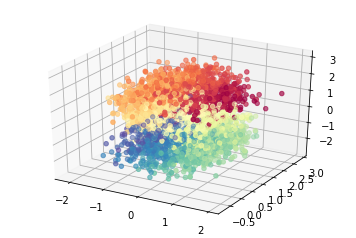

In [170]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_crr[:, 0], x_crr[:, 1], x_crr[:, 2], c=ytest, cmap=plt.cm.Spectral)
#plt.savefig('../figures/SR_3D_noise.png')
#plt.savefig('../figures/SC_3D_noise.png')
plt.show()

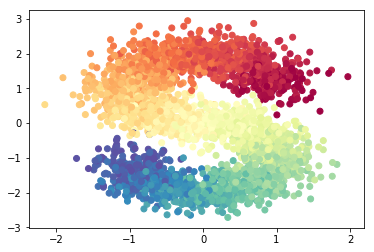

In [172]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_crr[:,0],x_crr[:,2],c=ytest,cmap=plt.cm.Spectral)
#plt.savefig('../figures/SR_2D_noise.png')
#plt.savefig('../figures/SC_2D_noise.png')
plt.show()

In [195]:
x_crr_lle = manifold.LocallyLinearEmbedding(15,2,eigen_solver = 'auto',
                                       method = 'modified').fit_transform(x_crr)


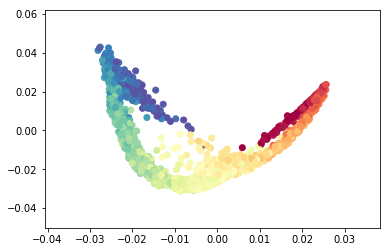

In [196]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_crr_lle[:,0],x_crr_lle[:,1],c=ytest,cmap=plt.cm.Spectral)
#plt.savefig('../figures/SR_lle_noise.png')
#plt.savefig('../figures/SC_lle_noise.png')
plt.show()

In [175]:
x_ds = toy_dae.apply_DS(x_crr,vr=0,max_iter=5)
#x_ds = toy_dae.predict(x_crr)
#x_ds = toy_dae.predict(x_ds)

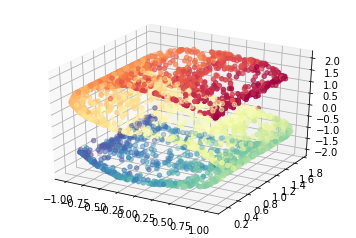

In [176]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_ds[:, 0], x_ds[:, 1], x_ds[:, 2], c=ytest, cmap=plt.cm.Spectral)
#plt.savefig('../figures/SR_3D_proj.png')
#plt.savefig('../figures/SC_3D_proj.png')
plt.show()

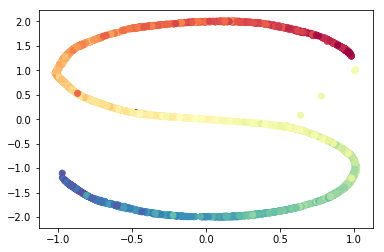

In [177]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_ds[:,0],x_ds[:,2],c=ytest,cmap=plt.cm.Spectral)
#plt.savefig('../figures/SR_2D_proj.png')
#plt.savefig('../figures/SC_2D_proj.png')
plt.show()

In [193]:
x_ds_lle = manifold.LocallyLinearEmbedding(15,2,eigen_solver = 'auto',
                                       method = 'modified').fit_transform(x_ds)


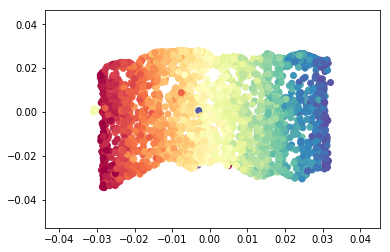

In [194]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_ds_lle[:,0],x_ds_lle[:,1],c=ytest,cmap=plt.cm.Spectral)
#plt.savefig('../figures/SR_lle_proj.png')
#plt.savefig('../figures/SC_lle_proj.png')
plt.show()

## Explicit Autoencoder

In [127]:
def Toy_dae(input_dim = (3,),dims = [100]):
    input_ex = Input(shape = input_dim)
    encoded = input_ex
    for idx, dim in enumerate(dims):
        encoded = Dense(dim,activation='relu',kernel_initializer = 'glorot_normal')(encoded)
    decoded = encoded
    for idx, dim in enumerate(dims[::-1]):
        if idx<len(dims)-1:
            decoded = Dense(dim,activation='relu',kernel_initializer = 'glorot_normal')(decoded)
        else:
            decoded = Dense(input_dim[0],activation='linear',kernel_initializer = 'glorot_normal')(decoded)

    encoder = Model(input_ex,encoded)
    autoencoder = Model(input_ex,decoded)
    input_z = Input(shape=(dims[-1],))
    decoder_layers = autoencoder.layers[len(dims)+1:]
    z_decoded = input_z
    for lyr in decoder_layers:
        z_decoded = lyr(z_decoded)
    decoder = Model(input_z,z_decoded)
    print(autoencoder.summary())
    return encoder, decoder, autoencoder

In [154]:
encoder, decoder, autoencoder = Toy_dae(dims = [2000])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        (None, 3)                 0         
_________________________________________________________________
dense_37 (Dense)             (None, 2000)              8000      
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 6003      
Total params: 14,003
Trainable params: 14,003
Non-trainable params: 0
_________________________________________________________________
None


In [155]:
loss_type = "mse"
noise_type = "gaussian"
noise_rep = 3
noise_scale = 0.3
data = xtrain
test_size = 0.3
num_batch = 300
epoch = 100
autoencoder.compile(optimizer = 'adadelta',loss = loss_type)
trainX, trainXn = corrupt_toy(xtrain,noise_type = noise_type,rep = noise_rep,scale = noise_scale)
idxs = np.array(range(len(data)))
val_num = int(len(idxs)*test_size)
xtr_o = trainX[idxs[val_num:]]
xtr_n = trainXn[idxs[val_num:]]
xval_o = trainX[idxs[:val_num]]
xval_n = trainXn[idxs[:val_num]]
print("loss type is ", loss_type)
print("train the DAE model with noise ", noise_type, " (",noise_scale,")")
autoencoder.fit(xtr_n,xtr_o,epochs = epoch, batch_size = num_batch,
                     shuffle = True, validation_data = (xval_n, xval_o),
                     callbacks = [TensorBoard(log_dir = '../logs/toy',histogram_freq=0,
                                              write_graph=False)])

loss type is  mse
train the DAE model with noise  gaussian  ( 0.3 )
Train on 1470 samples, validate on 630 samples
Epoch 1/100
1470/1470 [==============================] - 0s 82us/step - loss: 1.1313 - val_loss: 0.9717
Epoch 2/100
1470/1470 [==============================] - 0s 13us/step - loss: 0.8465 - val_loss: 0.7079
Epoch 3/100
1470/1470 [==============================] - 0s 13us/step - loss: 0.6045 - val_loss: 0.4825
Epoch 4/100
1470/1470 [==============================] - 0s 13us/step - loss: 0.4021 - val_loss: 0.3050
Epoch 5/100
1470/1470 [==============================] - 0s 14us/step - loss: 0.2512 - val_loss: 0.1887
Epoch 6/100
1470/1470 [==============================] - 0s 14us/step - loss: 0.1595 - val_loss: 0.1292
Epoch 7/100
1470/1470 [==============================] - 0s 14us/step - loss: 0.1148 - val_loss: 0.1044
Epoch 8/100
1470/1470 [==============================] - 0s 14us/step - loss: 0.0959 - val_loss: 0.0946
Epoch 9/100
1470/1470 [==============================

1470/1470 [==============================] - 0s 15us/step - loss: 0.0666 - val_loss: 0.0722
Epoch 79/100
1470/1470 [==============================] - 0s 15us/step - loss: 0.0667 - val_loss: 0.0722
Epoch 80/100
1470/1470 [==============================] - 0s 15us/step - loss: 0.0664 - val_loss: 0.0718
Epoch 81/100
1470/1470 [==============================] - 0s 15us/step - loss: 0.0663 - val_loss: 0.0716
Epoch 82/100
1470/1470 [==============================] - 0s 15us/step - loss: 0.0659 - val_loss: 0.0724
Epoch 83/100
1470/1470 [==============================] - 0s 14us/step - loss: 0.0660 - val_loss: 0.0715
Epoch 84/100
1470/1470 [==============================] - 0s 14us/step - loss: 0.0659 - val_loss: 0.0717
Epoch 85/100
1470/1470 [==============================] - 0s 15us/step - loss: 0.0658 - val_loss: 0.0712
Epoch 86/100
1470/1470 [==============================] - 0s 15us/step - loss: 0.0659 - val_loss: 0.0726
Epoch 87/100
1470/1470 [==============================] - 0s 15us/st

In [156]:
x_ds = autoencoder.predict(x_crr)
x_ds2 = autoencoder.predict(x_ds)
x_ds3 = autoencoder.predict(x_ds2)
x_ds3 = autoencoder.predict(x_ds3)

# x_ds = toy_dae.predict(x_crr)
# x_ds2 = toy_dae.predict(x_ds)
# x_ds3 = toy_dae.predict(x_ds2)
# x_ds3 = toy_dae.predict(x_ds3)
#x_ds = xtest

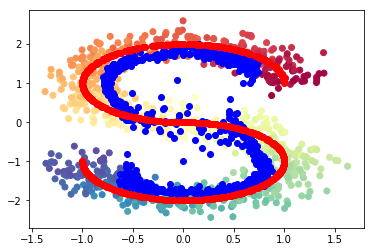

In [157]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_crr[:,0],x_crr[:,2],c=ytest,cmap=plt.cm.Spectral)
ax.scatter(x_ds3[:,0],x_ds3[:,2],color='b',cmap=plt.cm.Spectral)
ax.scatter(xtest[:,0],xtest[:,2],color='r',cmap=plt.cm.Spectral)
plt.show()